# 1D flow and solute transport

In [37]:
import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft
import glob
from natsort import natsorted

Find Tecplot point files in current directory

In [38]:
# path = []
# path.append('.')

# files = pft.get_tec_filenames('1D_solute',list(range(9)) + [1]) # CHANGE this for new filename and range
# filenames = pft.get_full_paths(path,files)

In [39]:
filenames = glob.glob("./1D_solute*.tec")
filenames = natsorted(filenames)

## Plot concentration profile over time

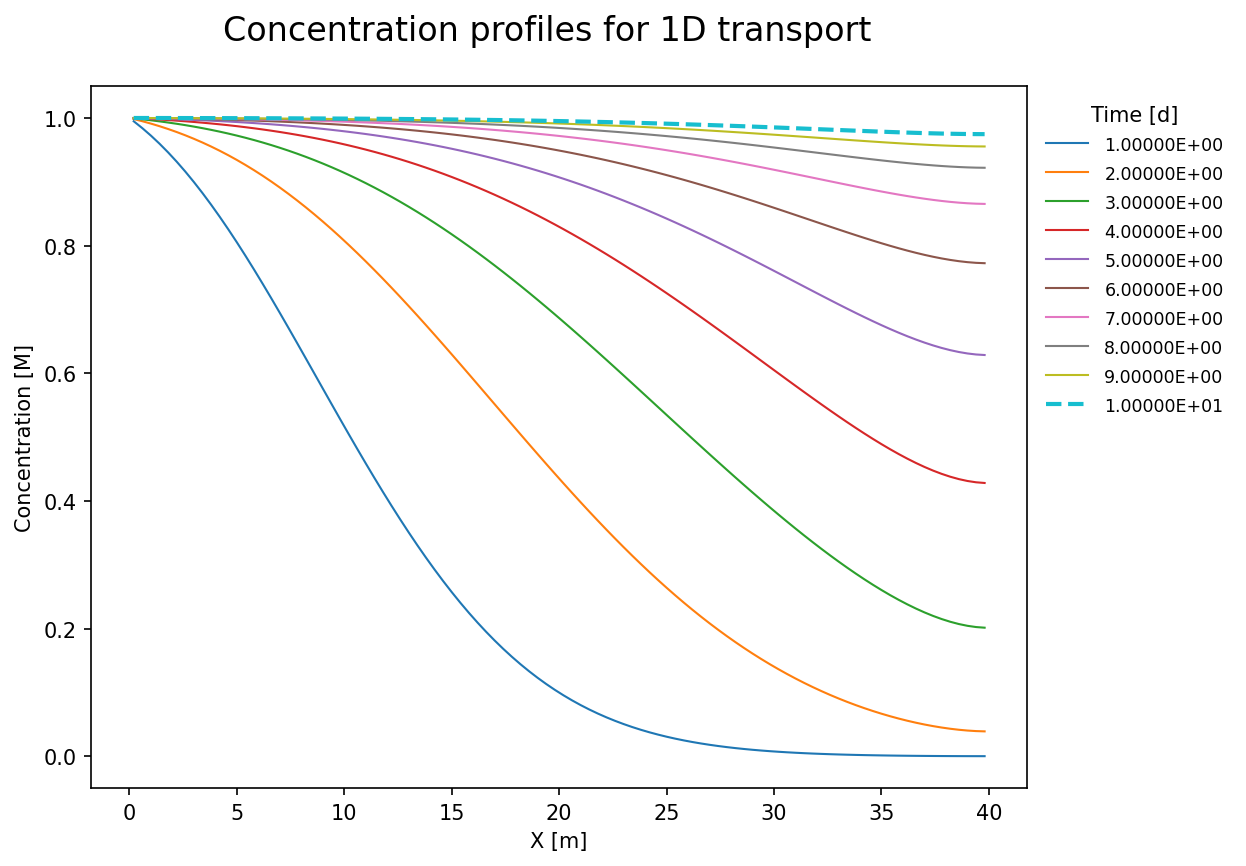

In [40]:
f = plt.figure(figsize=(8,6), dpi=150)
plt.subplot(1,1,1)
f.suptitle("Concentration profiles for 1D transport",fontsize=16)
plt.xlabel('X [m]')
plt.ylabel('Concentration [M]')

# plt.xlim(0.,1.)

# set line styles
line_styles = []
for i in range(len(filenames)-1):
    line_styles.append('-')
line_styles.append('--')

line_widths = []
for i in range(len(filenames)-1):
    line_widths.append(1)
line_widths.append(2)

# read data and plot 
for ifile in range(len(filenames)):
    # select the variables for the plot
    # MODIFY this if your want to plot different variables
    x_var = 1 # the 5th variable in the .tec file (i.e., "X [m]")
    y_var = 6 # the 3rd variable in the .tec file (i.e., "Total Tracer [M]")
    data = pft.Dataset(filenames[ifile],x_var,y_var) 
    plt.plot(data.get_array('x'),data.get_array('y'),label=data.title, \
           ls=line_styles[ifile],lw=line_widths[ifile])

# set legend
# plt.legend(loc=1,title='Time [y]')
plt.legend(loc='upper left', title='Time [d]', fontsize = 10, bbox_to_anchor = (1.0,1.0))
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
plt.gca().get_legend().get_frame().set_fill(False)
plt.gca().get_legend().draw_frame(False)

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.12,right=.9)

plt.show()

## Plot breakthrough curve

The observation point is located at midpoint of the column.

In [41]:
filenames = glob.glob("./1D_solute*.pft")
# filenames = natsorted(filenames)

In [42]:
# filenames = ['./1D_vsat_flow_pulse_2layer-obs-0.pft'] #!MODIFY this if your observation file name is different.

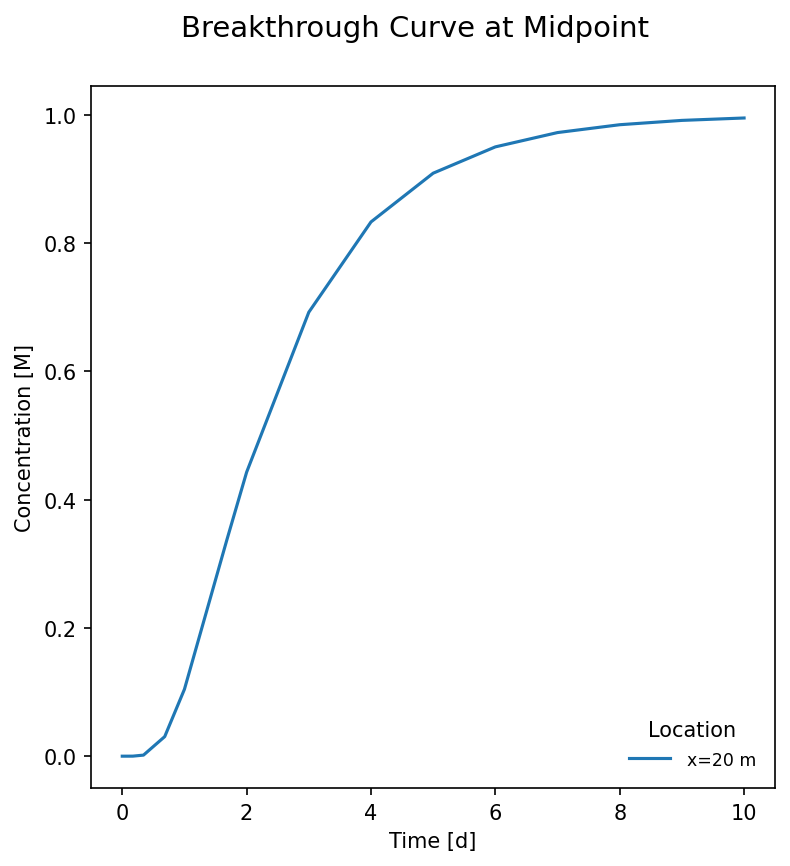

In [43]:
f = plt.figure(figsize=(6,6), dpi=150)
plt.subplot(1,1,1)
f.suptitle("Breakthrough Curve at Midpoint",fontsize=14)
plt.xlabel('Time [d]')
plt.ylabel('Concentration [M]')

# select the column index in the observation file
column_index = 4 #!MODIFY this if your variable is different
data = pft.Dataset(filenames[0],1,column_index)
plt.plot(data.get_array('x'),data.get_array('y'),label='x=20 m')

plt.legend(loc="lower right",title='Location')
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
plt.gca().get_legend().get_frame().set_fill(False)
plt.gca().get_legend().draw_frame(False)

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.14,right=.9)

plt.show()